## **Titanic**

# **Capítulo 6.1: Importação e Visualização do Banco de Dados**

Objetivo desta etapa:
- Carregar `train.csv` e `test.csv`
- Fazer inspeção inicial do **treino**: tipos (`.info()`), nulos (`.isnull().sum()`), estatísticas (`.describe()`)
- Separar **apenas features numéricas**
- Tratar NaNs conforme a apostila:
  - **Treino**: `dropna()`
  - **Teste**: `fillna(0)`

> Observação: esta seção prepara os objetos que serão usados no 6.2 (exploração) e 6.3 (modelo).


In [1]:
# 6.1 — Setup e importações
import io, os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# (Neste capítulo não treinamos ainda, mas vamos usar depois)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reprodutibilidade
np.random.seed(0)

print("Bibliotecas carregadas.")


Bibliotecas carregadas.


## Carregando os dados

A célula abaixo tenta ler `train.csv` e `test.csv`:
1. Primeiro, procura em `/content` (padrão do Colab)  
2. Depois, no diretório atual  
3. Se não achar, abre **upload** (apenas no Colab)


In [2]:
def load_csv_or_upload(filename, colab_default_dir="/content"):
    """
    Lê o CSV de:
      1) /content/filename (Colab), se existir
      2) ./filename (diretório atual), se existir
      3) abre seletor de upload (se estiver no Colab)
    """
    # 1) Caminho padrão do Colab
    colab_path = os.path.join(colab_default_dir, filename)
    if os.path.exists(colab_path):
        return pd.read_csv(colab_path)

    # 2) Diretório atual
    local_path = os.path.join(os.getcwd(), filename)
    if os.path.exists(local_path):
        return pd.read_csv(local_path)

    # 3) Upload (somente Colab)
    try:
        from google.colab import files
        print(f"Selecione o arquivo {filename} para upload…")
        uploaded = files.upload()
        if filename in uploaded:
            return pd.read_csv(io.BytesIO(uploaded[filename]))

        any_name = next(iter(uploaded))
        print(f"Aviso: usando '{any_name}' como {filename}.")
        return pd.read_csv(io.BytesIO(uploaded[any_name]))
    except Exception as e:
        raise FileNotFoundError(
            f"Não foi possível carregar {filename}. "
            f"Coloque o arquivo no diretório de trabalho ou use upload no Colab. Erro: {e}"
        )

# Carregar os datasets do Titanic
train = load_csv_or_upload("train.csv")
test  = load_csv_or_upload("test.csv")

print("Dimensões — train:", train.shape, " | test:", test.shape)
display(train.head())


Dimensões — train: (891, 12)  | test: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspeção inicial (treino e teste)

- `.info()` para tipos e contagem de não-nulos  
- `.isnull().sum()` para ver NaNs por coluna  
- `.describe()` (numérico) e `describe(include='all')` (completo)

In [3]:
print("\n[INFO] Treino:")
print(train.info())

print("\n[NULLS] Valores ausentes (treino):")
print(train.isnull().sum())

print("\n[DESCRIBE] Estatísticas numéricas (treino):")
display(train.describe())  # numéricas

print("\n[DESCRIBE] Estatísticas completas (treino):")
display(train.describe(include='all'))  # numéricas + categóricas

# (Opcional, recomendado) Checagem rápida do TESTE
print("\n[INFO] Teste:")
print(test.info())

print("\n[NULLS] Valores ausentes (teste):")
print(test.isnull().sum())



[INFO] Treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

[NULLS] Valores ausentes (treino):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



[DESCRIBE] Estatísticas completas (treino):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



[INFO] Teste:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

[NULLS] Valores ausentes (teste):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Seleção de features numéricas e tratamento de NaNs (exigência da apostila)

- Pegar **apenas colunas numéricas** do treino (exceto `Survived` e `PassengerId`)
- **Treino:** remover linhas com NaN (`dropna`)
- **Teste:** garantir mesmas colunas e preencher NaN com `0` (`fillna(0)`)


In [4]:
TARGET = "Survived"     # coluna alvo no treino
ID_COL = "PassengerId"  # coluna de identificação (não é feature)

# Selecionar numéricas de forma robusta (int/float, qualquer precisão)
num_cols_train = train.select_dtypes(include='number').columns.tolist()

# Remover a coluna alvo e o ID da lista de features numéricas
feature_cols = [c for c in num_cols_train if c not in [TARGET, ID_COL]]

# Conjuntos numéricos do treino
X_num = train[feature_cols].copy()
y     = train[TARGET].astype(int)

# TREINO: remover linhas com NaN nas features
X_num_clean = X_num.dropna(axis=0)
y_clean     = y.loc[X_num_clean.index]

# TESTE: alinhar colunas e preencher NaN com 0
X_test_num = test.reindex(columns=feature_cols).copy()
X_test_num = X_test_num.fillna(0)

print("\n[FEATURES] Colunas numéricas usadas como features:")
print(feature_cols)

print("\n[SHAPES] Formas após o tratamento:")
print("X_num_clean:", X_num_clean.shape, "| y_clean:", y_clean.shape, "| X_test_num:", X_test_num.shape)

# Checagem final de nulos
print("\n[CHECK] Nulos remanescentes — treino(features limpas) vs teste(preenchido):")
print("Treino (features limpas) ->", X_num_clean.isnull().sum().sum(), "nulos")
print("Teste  (features preench.) ->", X_test_num.isnull().sum().sum(), "nulos")



[FEATURES] Colunas numéricas usadas como features:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

[SHAPES] Formas após o tratamento:
X_num_clean: (714, 5) | y_clean: (714,) | X_test_num: (418, 5)

[CHECK] Nulos remanescentes — treino(features limpas) vs teste(preenchido):
Treino (features limpas) -> 0 nulos
Teste  (features preench.) -> 0 nulos


# **6.2 — Exploração do Banco de Dados**

Nesta etapa vamos:
- Explorar rapidamente algumas relações com a variável alvo (`Survived`)
- **Agrupar `Age` em 8 faixas** (`pd.cut`) — requisito da apostila
- Fazer **barplots** de sobrevivência por categorias/faixas

,Survived
AgeBin8,
"(0.34, 10.368]",0.593750
"(10.368, 20.315]",0.382609
"(20.315, 30.263]",0.365217
"(30.263, 40.21]",0.445161
"(40.21, 50.158]",0.383721
"(50.158, 60.105]",0.404762
"(60.105, 70.052]",0.235294
"(70.052, 80.0]",0.200000


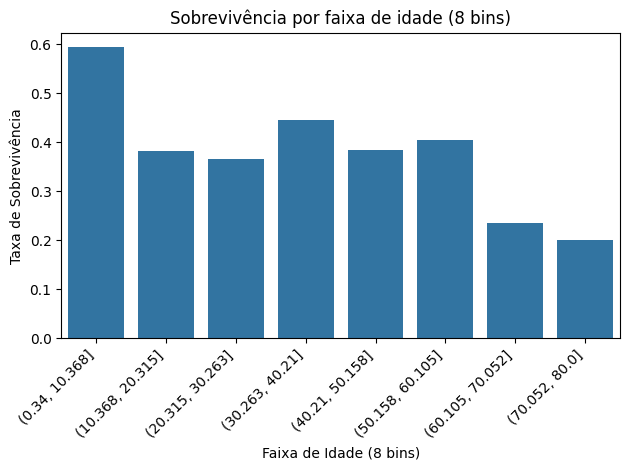

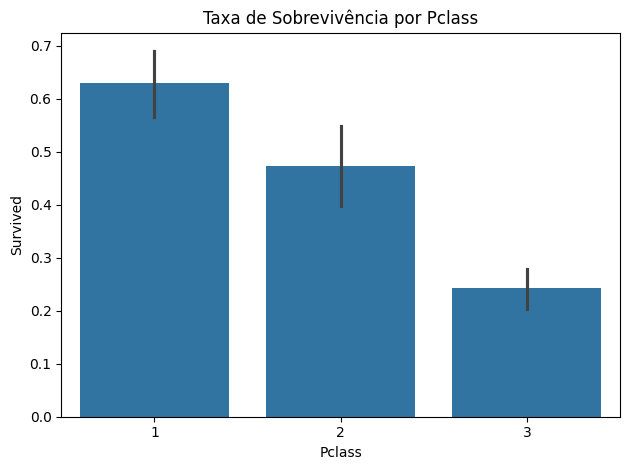

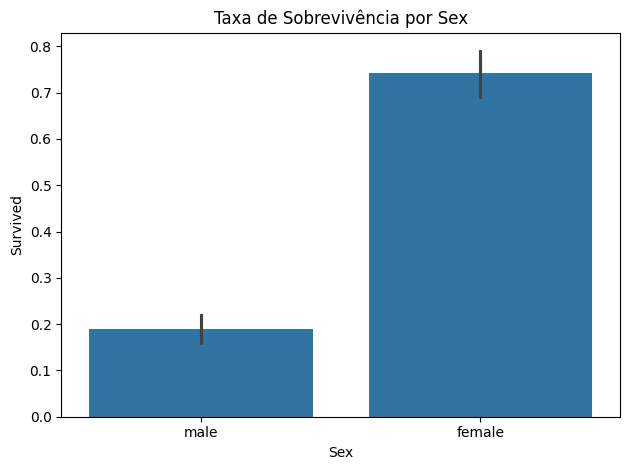

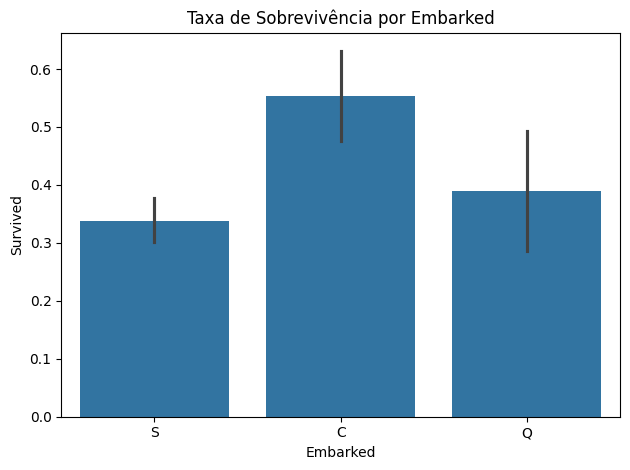

In [5]:
# Garantir que a coluna Age exista e criar faixas de idade (8 bins)
if "Age" in train.columns:
    # Criar coluna de faixas de idade (em 8 intervalos)
    train["AgeBin8"] = pd.cut(train["Age"], bins=8)

    # Taxa de sobrevivência por faixa de idade (8 bins)
    age_surv = train.groupby("AgeBin8")["Survived"].mean()
    display(age_surv)

    # Barplot de sobrevivência por faixa de idade
    plt.figure()
    sns.barplot(x=age_surv.index.astype(str), y=age_surv.values)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Faixa de Idade (8 bins)")
    plt.ylabel("Taxa de Sobrevivência")
    plt.title("Sobrevivência por faixa de idade (8 bins)")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'Age' não encontrada no dataset.")

# Exemplos adicionais de exploração rápida (opcional, mas úteis):
cat_cols = ["Pclass", "Sex", "Embarked"]
for col in cat_cols:
    if col in train.columns:
        plt.figure()
        sns.barplot(data=train, x=col, y="Survived")
        plt.title(f"Taxa de Sobrevivência por {col}")
        plt.tight_layout()
        plt.show()


# **6.3 — Treinamento do Modelo e Geração da Submissão**

Nesta etapa vamos:
- Montar **X** (features numéricas, sem `Survived` e sem `PassengerId`) e **y**
- Fazer **train/test split 80/20** com `random_state=0`
- Treinar um **RandomForestClassifier**
- Calcular **accuracy**
- **(Opcional)** Gerar **CSV de submissão** no formato Kaggle



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Partimos de X_num_clean (features numéricas sem nulos) e y_clean (alvo alinhado)
X = X_num_clean.copy()
y = y_clean.copy()

# Split 80/20 com estratificação (boa prática em classificação)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Modelo baseline: RandomForest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=0,
    n_jobs=-1
)

rf.fit(X_tr, y_tr)
pred = rf.predict(X_te)
acc = accuracy_score(y_te, pred)
print(f"Accuracy (val 20%): {acc:.4f}")


Accuracy (val 20%): 0.6993


In [7]:
# Para criar submissão, precisamos prever no conjunto de TESTE.
# Usaremos as MESMAS colunas numéricas (feature_cols) que foram usadas no treino.

# Garantir alinhamento de colunas no conjunto de teste e preencher NaNs (já feito no 6.1)
X_test_aligned = X_test_num.copy()

# Se alguma coluna faltou no teste (não deveria, mas por segurança):
for c in X.columns:
    if c not in X_test_aligned.columns:
        X_test_aligned[c] = 0.0

# Reordenar colunas exatamente como em X (mesma ordem do treino)
X_test_aligned = X_test_aligned.reindex(columns=X.columns)

# Prever Survived no TESTE
test_pred = rf.predict(X_test_aligned)

# Montar DataFrame de submissão no formato Kaggle
# (PassengerId vem do arquivo test.csv)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred.astype(int)
})

display(submission.head())

# Salvar CSV
submission.to_csv("submission_baseline_rf.csv", index=False)
print("Arquivo 'submission_baseline_rf.csv' gerado.")


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


Arquivo 'submission_baseline_rf.csv' gerado.


# **Capítulo 7 — Preparação de Dados**

Nesta etapa, a apostila pede:

- Criar cópias `train_clean` e `test_clean`
- Remover colunas `Cabin` e `Ticket`
- Imputar valores ausentes:
  - `Age` → mediana
  - `Fare` → mediana
  - `Embarked` → moda (mais frequente)
- Criar variáveis derivadas:
  - `Age` em 5 faixas (`pd.cut`)
  - `Fare` em 6 quantis (`pd.qcut`)


In [8]:
# Criar cópias para não alterar os DataFrames originais
train_clean = train.copy()
test_clean  = test.copy()

# Remover Cabin e Ticket, conforme instrução da apostila
cols_to_drop = ["Cabin", "Ticket"]
for col in cols_to_drop:
    if col in train_clean.columns:
        train_clean.drop(columns=col, inplace=True)
    if col in test_clean.columns:
        test_clean.drop(columns=col, inplace=True)

print("Colunas removidas:", cols_to_drop)
print("Dimensões — train_clean:", train_clean.shape, " | test_clean:", test_clean.shape)


Colunas removidas: ['Cabin', 'Ticket']
Dimensões — train_clean: (891, 11)  | test_clean: (418, 9)


In [9]:
# Age → mediana
if "Age" in train_clean.columns:
    median_age = train_clean["Age"].median()
    train_clean["Age"].fillna(median_age, inplace=True)
    test_clean["Age"].fillna(median_age, inplace=True)

# Fare → mediana
if "Fare" in train_clean.columns:
    median_fare = train_clean["Fare"].median()
    train_clean["Fare"].fillna(median_fare, inplace=True)
    test_clean["Fare"].fillna(median_fare, inplace=True)

# Embarked → moda (valor mais frequente)
if "Embarked" in train_clean.columns:
    mode_embarked = train_clean["Embarked"].mode()[0]
    train_clean["Embarked"].fillna(mode_embarked, inplace=True)
    test_clean["Embarked"].fillna(mode_embarked, inplace=True)

print("Valores ausentes após imputação (treino):")
print(train_clean.isnull().sum())


Valores ausentes após imputação (treino):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeBin8        177
dtype: int64


In [10]:
# Age em 5 faixas
if "Age" in train_clean.columns:
    train_clean["AgeBin5"] = pd.cut(train_clean["Age"], bins=5)
    test_clean["AgeBin5"]  = pd.cut(test_clean["Age"], bins=5)

# Fare em 6 quantis
if "Fare" in train_clean.columns:
    train_clean["FareBin6"] = pd.qcut(train_clean["Fare"], q=6, duplicates="drop")
    test_clean["FareBin6"]  = pd.qcut(test_clean["Fare"], q=6, duplicates="drop")

print("Novas colunas adicionadas: AgeBin5, FareBin6")
display(train_clean[["Age", "AgeBin5", "Fare", "FareBin6"]].head())


Novas colunas adicionadas: AgeBin5, FareBin6


,Age,AgeBin5,Fare,FareBin6
0,22.0,"(16.336, 32.252]",7.2500,"(-0.001, 7.775]"
1,38.0,"(32.252, 48.168]",71.2833,"(52.369, 512.329]"
2,26.0,"(16.336, 32.252]",7.9250,"(7.775, 8.662]"
3,35.0,"(32.252, 48.168]",53.1000,"(52.369, 512.329]"
4,35.0,"(32.252, 48.168]",8.0500,"(7.775, 8.662]"


# **Capítulo 8 — Pipelines, Validação Cruzada e Gradient Boosting**

Objetivos:
- Montar **pipelines** com `ColumnTransformer`, **imputers** e **encoders** (One-Hot/Ordinal)
- Rodar **validação cruzada** (`cross_val_score`)
- Testar **GradientBoostingClassifier** (ou `HistGradientBoostingClassifier`)
- **Loopar combinações** de imputers/encoders e comparar resultados


In [11]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Usei os dados limpos do Capítulo 7: train_clean/test_clean
# Garantias:
# - TARGET e ID_COL
TARGET = "Survived"
ID_COL = "PassengerId"

# X e y para modelagem (a partir do train_clean)
cols_to_drop = [TARGET, ID_COL]
X_base = train_clean.drop(columns=[c for c in cols_to_drop if c in train_clean.columns]).copy()
y_base = train_clean[TARGET].astype(int).copy()

# Seletores de colunas por tipo
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include=["object", "category", "bool"])

num_cols = num_selector(X_base)
cat_cols = cat_selector(X_base)

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)
print("Formas — X_base:", X_base.shape, "| y_base:", y_base.shape)


Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Embarked', 'AgeBin8', 'AgeBin5', 'FareBin6']
Formas — X_base: (891, 11) | y_base: (891,)


In [12]:
# Transformação numérica padrão (placeholders; serão trocados no loop)
num_imputer_mean   = SimpleImputer(strategy="mean")
num_imputer_median = SimpleImputer(strategy="median")

# Transformação categórica padrão (também será variada)
cat_imputer_mode   = SimpleImputer(strategy="most_frequent")
cat_imputer_const  = SimpleImputer(strategy="constant", fill_value="missing")

# Encoders
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# ColumnTransformers “templates”
ct_ohe_mean_mode = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", num_imputer_mean)]),  num_cols),
        ("cat", Pipeline([("imputer", cat_imputer_mode), ("enc", ohe)]), cat_cols),
    ],
    remainder="drop"
)

ct_ord_median_const = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", num_imputer_median)]),  num_cols),
        ("cat", Pipeline([("imputer", cat_imputer_const), ("enc", ord_enc)]), cat_cols),
    ],
    remainder="drop"
)

print("Dois exemplos de ColumnTransformer configurados.")


Dois exemplos de ColumnTransformer configurados.


8.2 — Pipeline completo com RandomForest

Agora unimos o pré-processamento com o modelo (RandomForest).
Usamos train_test_split e accuracy_score para avaliação.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

gb = GradientBoostingClassifier(random_state=0)

pipe_example = Pipeline([
    ("prep", ct_ohe_mean_mode),
    ("clf", gb),
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(pipe_example, X_base, y_base, cv=cv, scoring="accuracy", n_jobs=-1)

print(f"GradientBoosting (OHE / num=mean, cat=mode) — CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


GradientBoosting (OHE / num=mean, cat=mode) — CV accuracy: 0.8170 ± 0.0365


In [14]:
# Cap. 8 — Loop de combinações (imputer × encoder) com correção para bins (Interval)
# Requisitos: ter `train_clean` pronto (Cap. 7)

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


# Base de modelagem a partir do train_clean

TARGET = "Survived"
ID_COL = "PassengerId"

X_base = train_clean.drop(columns=[c for c in [TARGET, ID_COL] if c in train_clean.columns]).copy()
y_base = train_clean[TARGET].astype(int).copy()

# Detectar colunas numéricas e categóricas
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include=["object", "category", "bool"])

num_cols = num_selector(X_base)
cat_cols = cat_selector(X_base)

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)
print("Formas — X_base:", X_base.shape, "| y_base:", y_base.shape)

# Utilitário: OneHotEncoder compatível (scikit-learn versões antigas/novas)

def make_ohe():
    try:
        # scikit-learn >= 1.2: usa 'sparse_output'
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        # versões mais antigas: usa 'sparse'
        return OneHotEncoder(handle_unknown="ignore", sparse=False)


# FIX para o erro "Encoders require ... Got ['Interval','str']"
# Garante que TODAS as categóricas sejam strings antes de codificar

to_str = FunctionTransformer(lambda X: X.astype(str), validate=False)

# Espaço de busca (como pede a apostila)
num_imputers = [
    ("mean",   SimpleImputer(strategy="mean")),
    ("median", SimpleImputer(strategy="median")),
]

cat_imputers = [
    ("mode",   SimpleImputer(strategy="most_frequent")),
    ("const",  SimpleImputer(strategy="constant", fill_value="missing")),
]

encoders = [
    ("onehot", make_ohe()),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
]


# Validação cruzada

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = []

for n_name, n_imp in num_imputers:
    for c_name, c_imp in cat_imputers:
        for e_name, enc in encoders:
            ct = ColumnTransformer(
                transformers=[
                    ("num", Pipeline([
                        ("imputer", n_imp)
                    ]), num_cols),


                    ("cat", Pipeline([
                        ("imputer", c_imp),
                        ("to_str", to_str),
                        ("enc", enc)
                    ]), cat_cols),
                ],
                remainder="drop"
            )

            pipe = Pipeline([
                ("prep", ct),
                ("clf", GradientBoostingClassifier(random_state=0)),
            ])

            scores = cross_val_score(pipe, X_base, y_base, cv=cv, scoring="accuracy", n_jobs=-1)
            results.append({
                "num_imputer": n_name,
                "cat_imputer": c_name,
                "encoder": e_name,
                "cv_mean": scores.mean(),
                "cv_std":  scores.std(),
            })

# Resultados
res_df = pd.DataFrame(results).sort_values(by=["cv_mean","cv_std"], ascending=[False, True])
display(res_df.reset_index(drop=True))

best = res_df.iloc[0].to_dict()
print("\nMelhor combinação (por média de acurácia):")
print(best)


Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Embarked', 'AgeBin8', 'AgeBin5', 'FareBin6']
Formas — X_base: (891, 11) | y_base: (891,)


,num_imputer,cat_imputer,encoder,cv_mean,cv_std
0,mean,mode,onehot,0.817023,0.036487
1,mean,const,onehot,0.817023,0.036487
2,median,mode,onehot,0.817023,0.036487
3,median,const,onehot,0.817023,0.036487
4,mean,const,ordinal,0.801337,0.029058
5,median,const,ordinal,0.801337,0.029058
6,mean,mode,ordinal,0.799096,0.032868
7,median,mode,ordinal,0.799096,0.032868



Melhor combinação (por média de acurácia):
{'num_imputer': 'mean', 'cat_imputer': 'mode', 'encoder': 'onehot', 'cv_mean': 0.817023413470592, 'cv_std': 0.036487247043048475}


## Cap. 8 — Loop com HistGradientBoosting + FIX para Interval -> str
Pré-requisitos: ter X_base, y_base, num_cols, cat_cols e os espaços
de busca (num_imputers, cat_imputers, encoders) como no bloco anterior.


In [ ]:

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingClassifier

# Se ainda não tiver X_base / y_base e as listas de colunas:
TARGET = "Survived"
ID_COL = "PassengerId"
try:
    X_base
    y_base
    num_cols
    cat_cols
except NameError:
    # monta a base a partir de train_clean
    X_base = train_clean.drop(columns=[c for c in [TARGET, ID_COL] if c in train_clean.columns]).copy()
    y_base = train_clean[TARGET].astype(int).copy()
    num_cols = make_column_selector(dtype_include="number")(X_base)
    cat_cols = make_column_selector(dtype_include=["object", "category", "bool"])(X_base)

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# OneHot compatível com versões antigas/novas do sklearn
def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Passo que converte todas as categóricas para string antes do encoder
to_str = FunctionTransformer(lambda X: X.astype(str), validate=False)

# Espaços de busca (se não tiverem sido definidos antes)
try:
    num_imputers
    cat_imputers
    encoders
except NameError:
    num_imputers = [
        ("mean",   SimpleImputer(strategy="mean")),
        ("median", SimpleImputer(strategy="median")),
    ]
    cat_imputers = [
        ("mode",   SimpleImputer(strategy="most_frequent")),
        ("const",  SimpleImputer(strategy="constant", fill_value="missing")),
    ]
    encoders = [
        ("onehot", make_ohe()),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results_hgb = []

for n_name, n_imp in num_imputers:
    for c_name, c_imp in cat_imputers:
        for e_name, enc in encoders:
            ct = ColumnTransformer(
                transformers=[
                    ("num", Pipeline([
                        ("imputer", n_imp)
                    ]), num_cols),


                    ("cat", Pipeline([
                        ("imputer", c_imp),
                        ("to_str", to_str),
                        ("enc", enc),
                    ]), cat_cols),
                ],
                remainder="drop"
            )

            pipe = Pipeline([
                ("prep", ct),
                ("clf", HistGradientBoostingClassifier(random_state=0)),
            ])

            scores = cross_val_score(pipe, X_base, y_base, cv=cv, scoring="accuracy", n_jobs=-1)
            results_hgb.append({
                "num_imputer": n_name,
                "cat_imputer": c_name,
                "encoder": e_name,
                "cv_mean": scores.mean(),
                "cv_std":  scores.std(),
            })

res_hgb = pd.DataFrame(results_hgb).sort_values(by=["cv_mean","cv_std"], ascending=[False, True]).reset_index(drop=True)
display(res_hgb)

best_hgb = res_hgb.iloc[0].to_dict()
print("\nMelhor combinação (HGB):")
print(best_hgb)


Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Embarked', 'AgeBin8', 'AgeBin5', 'FareBin6']


,num_imputer,cat_imputer,encoder,cv_mean,cv_std
0,mean,mode,onehot,0.810294,0.020158
1,median,mode,onehot,0.810294,0.020158
2,mean,const,onehot,0.805806,0.026680
3,median,const,onehot,0.805806,0.026680
4,mean,const,ordinal,0.797954,0.025307
5,median,const,ordinal,0.797954,0.025307
6,mean,mode,ordinal,0.783372,0.018510
7,median,mode,ordinal,0.783372,0.018510



Melhor combinação (HGB):
{'num_imputer': 'mean', 'cat_imputer': 'mode', 'encoder': 'onehot', 'cv_mean': 0.8102943945766118, 'cv_std': 0.020158491027410845}


## 8.5 — Submissão final no Kaggle

Treinamos no dataset completo de treino e geramos predições para o test_clean.

In [ ]:
# Ajuste antes do fit/predict: garantir AgeBin8 no train_clean e test_clean
# com os MESMOS limites de bins do treino.

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

TARGET = "Survived"
ID_COL = "PassengerId"

# 1) Criar AgeBin8 no train_clean (se ainda não existir)
if "Age" in train_clean.columns:
    if "AgeBin8" not in train_clean.columns:
        # cria AgeBin8 no treino
        train_clean["AgeBin8"] = pd.cut(train_clean["Age"], bins=8)

    # 2) Extrair os limites dos bins do treino e aplicar no teste
    #    Isso garante consistência entre train e test.
    if pd.api.types.is_categorical_dtype(train_clean["AgeBin8"]):
        cats = train_clean["AgeBin8"].cat.categories
    else:
        # caso raro: veio como object; reconstrói do zero e pega categorias
        tmp = pd.cut(train_clean["Age"], bins=8)
        cats = tmp.cat.categories

    # Monta a lista de limites [left0, right0, right1, ..., right7]
    bin_edges = [cats[0].left] + [iv.right for iv in cats]

    # Recria AgeBin8 no train_clean e cria no test_clean com as MESMAS bordas
    train_clean["AgeBin8"] = pd.cut(train_clean["Age"], bins=bin_edges, include_lowest=True)
    test_clean["AgeBin8"]  = pd.cut(test_clean["Age"],  bins=bin_edges, include_lowest=True)

# (Opcional) Converter os bins para string já no DataFrame — não é obrigatório
# se você usar o passo 'to_str' no pipeline, mas ajuda a evitar surpresas.

# train_clean["AgeBin8"] = train_clean["AgeBin8"].astype(str)
# test_clean["AgeBin8"]  = test_clean["AgeBin8"].astype(str)


# Reconstruir o melhor pré-processamento com o passo 'to_str'


# OneHot compatível com versões antigas/novas do sklearn
def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Passo que converte todas as categóricas para string antes do encoder
to_str = FunctionTransformer(lambda X: X.astype(str), validate=False)

use_hgb = True

if use_hgb:
    best_combo = best_hgb
    final_clf = HistGradientBoostingClassifier(random_state=0)
else:
    best_combo = best
    final_clf = GradientBoostingClassifier(random_state=0)

# Recuperar os melhores componentes escolhidos no loop
n_imp = dict(num_imputers)[best_combo["num_imputer"]]
c_imp = dict(cat_imputers)[best_combo["cat_imputer"]]
enc   = dict(encoders)[best_combo["encoder"]]

# Reconstruir X_base/y_base (caso tenha mudado colunas ao criar AgeBin8)
X_base = train_clean.drop(columns=[c for c in [TARGET, ID_COL] if c in train_clean.columns]).copy()
y_base = train_clean[TARGET].astype(int).copy()

# Recalcular listas de colunas por tipo
from sklearn.compose import make_column_selector
num_cols = make_column_selector(dtype_include="number")(X_base)
cat_cols = make_column_selector(dtype_include=["object", "category", "bool"])(X_base)

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# ColumnTransformer com 'to_str' no ramo categórico
ct_best = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", n_imp),
        ]), num_cols),

        ("cat", Pipeline([
            ("imputer", c_imp),
            ("to_str", to_str),   # <-- evita erro com Interval
            ("enc", enc),
        ]), cat_cols),
    ],
    remainder="drop"
)

pipe_best = Pipeline([
    ("prep", ct_best),
    ("clf", final_clf),
])

# Fit no treino completo
pipe_best.fit(X_base, y_base)

# Preparar X_test com as MESMAS colunas (tirar apenas ID)
X_test_base = test_clean.drop(columns=[c for c in [ID_COL] if c in test_clean.columns]).copy()

# Predict no teste
test_pred = pipe_best.predict(X_test_base)

submission_8 = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred.astype(int)
})

display(submission_8.head())
submission_8.to_csv("submission_ch8_best.csv", index=False)
print("Arquivo 'submission_ch8_best.csv' gerado com a melhor combinação do Cap. 8.")


Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Embarked', 'AgeBin8', 'AgeBin5', 'FareBin6']


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Arquivo 'submission_ch8_best.csv' gerado com a melhor combinação do Cap. 8.


# **Capítulo 9 — Engenharia de Atributos, Seleção e Redução de Dimensionalidade**

Nesta etapa a apostila pede:

- **9.1** Seleção de atributos via *Mutual Information*
- **9.2** Engenharia de atributos:
  - Extrair `Title` de `Name` e remover a coluna `Name`
  - Criar `FamilySize = SibSp + Parch`
  - Criar variável booleana `IsAlone`
- **9.3** K-Means + PCA:
  - Remover outliers (ex.: `Fare > 500`)
  - Rodar `KMeans(n_clusters=6)` em `Age × Fare`
  - Adicionar coluna `Cluster` e avaliar relevância via MI
  - Normalizar com `MinMaxScaler` e aplicar `PCA`
  - Criar feature `AgeFare_PCA1`
- **9.4** Target Encoding:
  - Usar `MEstimateEncoder` (m=5)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Usar train_clean (do cap.7) para base
X9 = train_clean.drop(columns=["Survived", "PassengerId"]).copy()
y9 = train_clean["Survived"]

# Selecionar apenas colunas numéricas + categóricas já codificadas simples
X9_enc = pd.get_dummies(X9, drop_first=True)

mi_scores = mutual_info_classif(X9_enc, y9, random_state=0)
mi_df = pd.DataFrame({"Feature": X9_enc.columns, "MI": mi_scores}).sort_values(by="MI", ascending=False)

display(mi_df.head(10))


,Feature,MI
895,Sex_male,0.145190
4,Fare,0.128068
0,Pclass,0.085416
693,"Name_Ridsdale, Miss. Lucy",0.048532
913,"FareBin6_(52.369, 512.329]",0.047915
222,"Name_Doling, Miss. Elsie",0.047345
176,"Name_Collyer, Miss. Marjorie ""Lottie""",0.044737
769,"Name_Sloper, Mr. William Thompson",0.044560
774,"Name_Smith, Mr. Richard William",0.040473
825,"Name_Trout, Mrs. William H (Jessie L)",0.037875


In [ ]:
# Extrair Title de Name (ex.: Mr, Mrs, Miss, Master...)
if "Name" in train_clean.columns:
    train_clean["Title"] = train_clean["Name"].str.extract(r",\s*([^\.]+)\.")
    test_clean["Title"]  = test_clean["Name"].str.extract(r",\s*([^\.]+)\.")
    # Remover a coluna Name
    train_clean.drop(columns="Name", inplace=True)
    test_clean.drop(columns="Name", inplace=True)

# Criar FamilySize = SibSp + Parch
if {"SibSp", "Parch"}.issubset(train_clean.columns):
    train_clean["FamilySize"] = train_clean["SibSp"] + train_clean["Parch"]
    test_clean["FamilySize"]  = test_clean["SibSp"] + test_clean["Parch"]

# Criar IsAlone = 1 se FamilySize == 0
train_clean["IsAlone"] = (train_clean["FamilySize"] == 0).astype(int)
test_clean["IsAlone"]  = (test_clean["FamilySize"] == 0).astype(int)

display(train_clean[["Title","FamilySize","IsAlone"]].head())


,Title,FamilySize,IsAlone
0,Mr,1,0
1,Mrs,1,0
2,Miss,0,1
3,Mrs,1,0
4,Mr,0,1


## 9.3 — KMeans + PCA

Passos:
- Remover outliers de `Fare` (ex.: `Fare > 500`)
- Rodar `KMeans(n_clusters=6)` em `Age` e `Fare`
- Adicionar coluna `Cluster`
- Avaliar relevância do cluster via Mutual Information
- Normalizar (`MinMaxScaler`) e aplicar `PCA`
- Criar feature `AgeFare_PCA1`


In [ ]:
from sklearn.cluster import KMeans

# Filtrar outliers de Fare > 500
df_km = train_clean[train_clean["Fare"] <= 500].copy()

# KMeans com 6 clusters em Age×Fare
km = KMeans(n_clusters=6, random_state=0, n_init="auto")
df_km["Cluster"] = km.fit_predict(df_km[["Age","Fare"]].fillna(0))

# Adicionar a coluna de cluster de volta no dataset original
train_clean = train_clean.merge(
    df_km[["PassengerId","Cluster"]],
    on="PassengerId",
    how="left"
)

# Teste: prever clusters para Age×Fare do test_clean (sem Survived)
test_clean["Cluster"] = km.predict(test_clean[["Age","Fare"]].fillna(0))

display(train_clean[["Age","Fare","Cluster"]].head())


,Age,Fare,Cluster
0,22.0,7.2500,0.0
1,38.0,71.2833,5.0
2,26.0,7.9250,0.0
3,35.0,53.1000,5.0
4,35.0,8.0500,0.0


In [ ]:
# Avaliar relevância da feature Cluster
mi_cluster = mutual_info_classif(train_clean[["Cluster"]].fillna(-1), train_clean["Survived"], random_state=0)
print("Mutual Information (Cluster vs Survived):", mi_cluster[0])


Mutual Information (Cluster vs Survived): 0.0435827162951985


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalizar Age e Fare
scaler = MinMaxScaler()
scaled = scaler.fit_transform(train_clean[["Age","Fare"]].fillna(0))

# PCA (1 componente)
pca = PCA(n_components=1, random_state=0)
train_clean["AgeFare_PCA1"] = pca.fit_transform(scaled)

# Aplicar no conjunto de teste
scaled_test = scaler.transform(test_clean[["Age","Fare"]].fillna(0))
test_clean["AgeFare_PCA1"] = pca.transform(scaled_test)

display(train_clean[["Age","Fare","AgeFare_PCA1"]].head())


,Age,Fare,AgeFare_PCA1
0,22.0,7.2500,-0.096407
1,38.0,71.2833,0.114800
2,26.0,7.9250,-0.046221
3,35.0,53.1000,0.074145
4,35.0,8.0500,0.066462


In [ ]:
!pip install category_encoders --quiet

import category_encoders as ce

# Exemplo: aplicar target encoding em 'Title' (variável categórica criada)
encoder = ce.MEstimateEncoder(cols=["Title"], m=5)

train_clean["Title_enc"] = encoder.fit_transform(train_clean["Title"], train_clean["Survived"])
test_clean["Title_enc"]  = encoder.transform(test_clean["Title"])

display(train_clean[["Title","Title_enc"]].head())


,Title,Title_enc
0,Mr,0.158849
1,Mrs,0.776301
2,Miss,0.689407
3,Mrs,0.776301
4,Mr,0.158849
